In [34]:
import pandas as pd
import os
import ast
import matplotlib.pyplot as plt

In [35]:
file_path = './CSV/dependenciesDetails'

list_high = []
list_mid = []
list_low = []

for file in os.listdir(file_path):
    if file.endswith(".csv"):
        prefix = int(file[:4])
        
        if 1 <= prefix <= 10:
            list_high.append(file)
        elif 89 <= prefix <= 485:
            list_mid.append(file)
        elif prefix > 957:
            list_low.append(file)
    
    

In [36]:
def depDetails(df):
    df['dependencyArtIDs'] = df['dependencyArtIDs'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


    df['releaseDate'] = df['releaseDate'].str.strip('"')
    df['releaseDate'] = pd.to_datetime(df['releaseDate'], format='%Y-%m-%dT%H:%M:%SZ')
    df['year'] = df['releaseDate'].dt.year
    
    df['addedDependency'] = 0
    df['removedDependency'] = 0
    
    df.at[0, 'addedDependency'] = len(set(df.loc[0, 'dependencyArtIDs']))
    
    for i in range(1, len(df)):
        #print(i)
        prev_dependency = set(df.loc[i-1, 'dependencyArtIDs'])
        #print(prev_dependency)
        curr_dependency = set(df.loc[i, 'dependencyArtIDs'])
        # print(curr_dependency)
    
        added_dep = curr_dependency - prev_dependency
        removed_dep = prev_dependency - curr_dependency
        
        df.at[i, 'addedDependency'] = len(added_dep)
        df.at[i, 'removedDependency'] = len(removed_dep)
    
    data = df[['year', 'addedDependency', 'removedDependency']]

    return data

In [37]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()

In [38]:
for file in list_high:
    temp_df = pd.read_csv(os.path.join(file_path,file))
    df = depDetails(temp_df)
    df1 = pd.concat([df1,df], ignore_index = True)

for file in list_mid:
    temp_df = pd.read_csv(os.path.join(file_path,file))
    df = depDetails(temp_df)
    df2 = pd.concat([df2,df], ignore_index = True)

for file in list_low:
    temp_df = pd.read_csv(os.path.join(file_path,file))
    df = depDetails(temp_df)
    df3 = pd.concat([df3,df], ignore_index = True)

In [39]:
df1

,releaseID,year,addedDependency,removedDependency
0,"""junit:junit:4.9""",2011,1,0
1,"""junit:junit:4.10""",2011,0,0
2,"""junit:junit:4.11-beta-1""",2012,0,0
3,"""junit:junit:4.11""",2012,0,0
4,"""junit:junit:4.12-beta-1""",2014,0,0
...,...,...,...,...
1217,"""com.fasterxml.jackson.core:jackson-databind:2...",2024,3,3
1218,"""com.fasterxml.jackson.core:jackson-databind:2...",2024,3,3
1219,"""com.fasterxml.jackson.core:jackson-databind:2...",2024,3,8
1220,"""com.fasterxml.jackson.core:jackson-databind:2...",2024,8,3


In [33]:
yearly_data1 = df1.groupby('year')[['addedDependency', 'removedDependency']].sum().reset_index()

print(yearly_data1)

    year  addedDependency  removedDependency
0   2006                8                  0
1   2007                2                  0
2   2008                9                  2
3   2009                3                  1
4   2010                7                  0
5   2011                3                  0
6   2012               14                  9
7   2013                2                  1
8   2014                2                  1
9   2015               24                 20
10  2016                9                  7
11  2017               17                 15
12  2018               19                 15
13  2019               21                 22
14  2020               34                 35
15  2021               63                 67
16  2022               53                 53
17  2023               86                 83
18  2024               31                 31


In [40]:
yearly_data2 = df2.groupby('year')[['addedDependency', 'removedDependency']].sum().reset_index()

print(yearly_data2)

    year  addedDependency  removedDependency
0   2005                6                  0
1   2006               30                 17
2   2007               32                  6
3   2008                9                  9
4   2009               16                 14
5   2010               30                 24
6   2011               38                 30
7   2012               72                 86
8   2013               49                 39
9   2014               29                 27
10  2015               13                 15
11  2016               16                 11
12  2017               16                 11
13  2018               14                 13
14  2019               31                 33
15  2020               83                 76
16  2021               18                 24
17  2022               26                 21
18  2023               23                 26
19  2024                7                 10


In [41]:
yearly_data3 = df3.groupby('year')[['addedDependency', 'removedDependency']].sum().reset_index()

print(yearly_data3)

    year  addedDependency  removedDependency
0   2013                5                  0
1   2014                4                  0
2   2015                2                  0
3   2016                1                  0
4   2017               14                  1
5   2018               11                  2
6   2019                3                  3
7   2020               11                  4
8   2021                6                  6
9   2022                6                  5
10  2023                3                  3
11  2024               20                 19


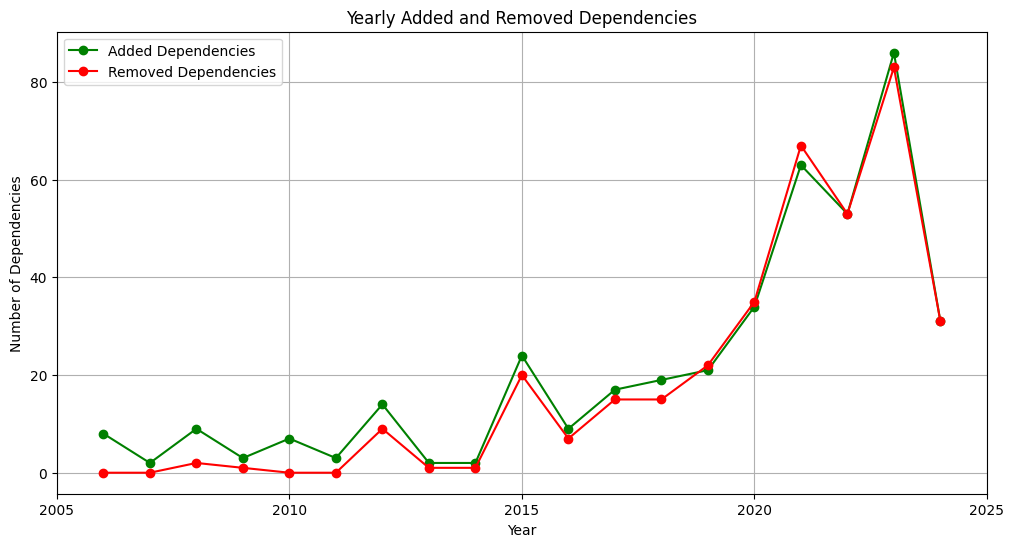

In [46]:
unique_years = sorted(yearly_data1['year'].unique())

start_year = unique_years[0]-1  
end_year = unique_years[-1]+1 
year_intervals = list(range(start_year, end_year + 1, 5))

plt.figure(figsize = (12,6))
plt.plot(yearly_data1['year'],yearly_data1['addedDependency'], marker='o', label='Added Dependencies', color='green')
plt.plot(yearly_data1['year'],yearly_data1['removedDependency'], marker='o', label='Removed Dependencies', color='red')

plt.xlim([start_year, end_year])
plt.xticks(year_intervals)

plt.title('Yearly Added and Removed Dependencies')
plt.xlabel('Year')
plt.ylabel('Number of Dependencies')
plt.legend()
plt.grid(True)
plt.show()

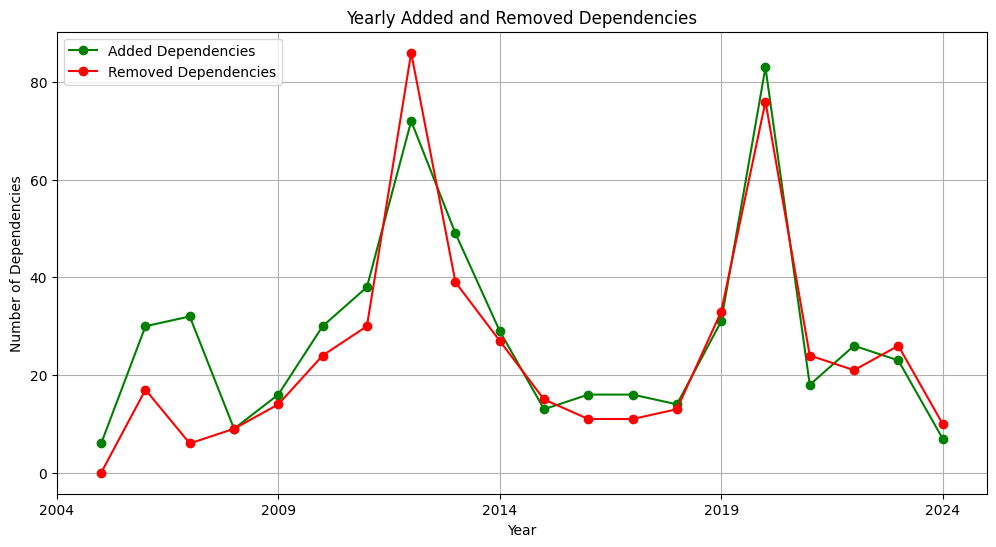

In [47]:
unique_years = sorted(yearly_data2['year'].unique())

start_year = unique_years[0]-1  
end_year = unique_years[-1]+1 
year_intervals = list(range(start_year, end_year + 1, 5))

plt.figure(figsize = (12,6))
plt.plot(yearly_data2['year'],yearly_data2['addedDependency'], marker='o', label='Added Dependencies', color='green')
plt.plot(yearly_data2['year'],yearly_data2['removedDependency'], marker='o', label='Removed Dependencies', color='red')

plt.xlim([start_year, end_year])
plt.xticks(year_intervals)

plt.title('Yearly Added and Removed Dependencies')
plt.xlabel('Year')
plt.ylabel('Number of Dependencies')
plt.legend()
plt.grid(True)
plt.show()

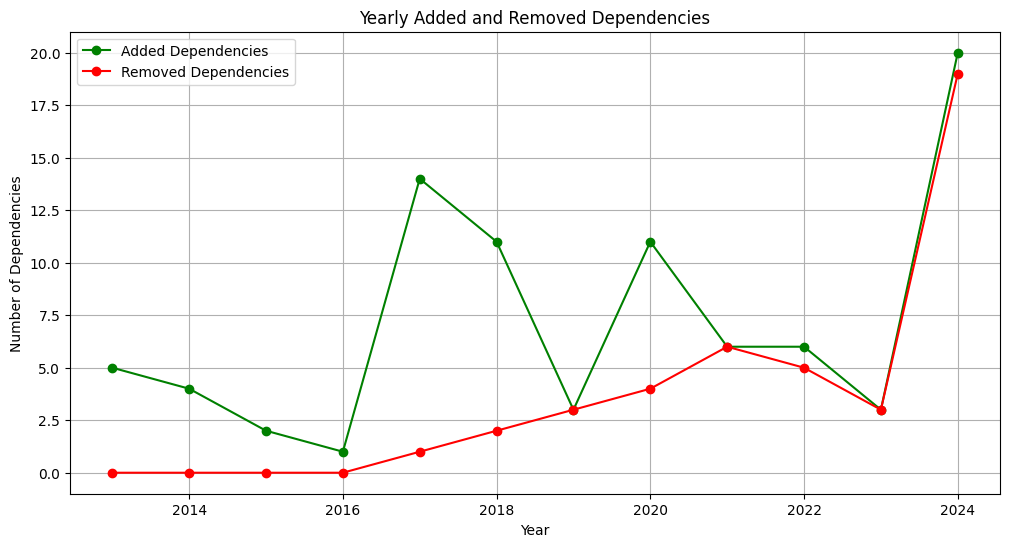

In [44]:
plt.figure(figsize = (12,6))
plt.plot(yearly_data3['year'],yearly_data3['addedDependency'], marker='o', label='Added Dependencies', color='green')
plt.plot(yearly_data3['year'],yearly_data3['removedDependency'], marker='o', label='Removed Dependencies', color='red')

plt.title('Yearly Added and Removed Dependencies')
plt.xlabel('Year')
plt.ylabel('Number of Dependencies')
plt.legend()
plt.grid(True)
plt.show()